<a href="https://colab.research.google.com/github/ghizlane89/0__GenIA/blob/Bootcamp/W5_D1_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow numpy scikit-learn matplotlib seaborn

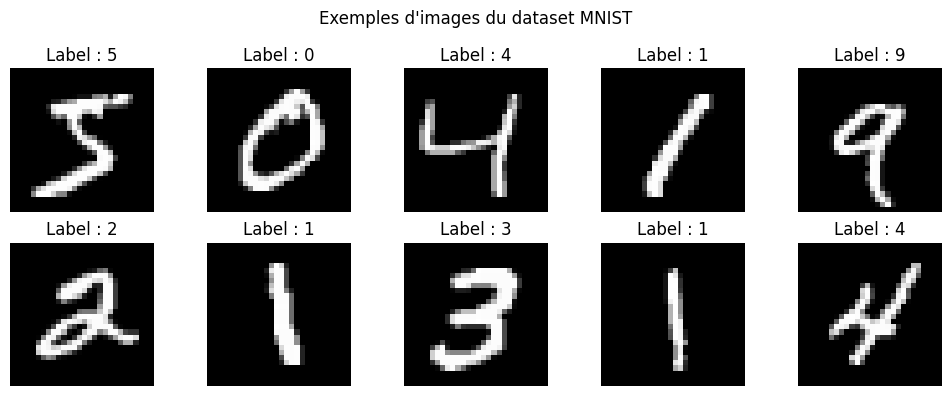

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8724 - loss: 0.4466 - val_accuracy: 0.9682 - val_loss: 0.1143
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9659 - loss: 0.1130 - val_accuracy: 0.9697 - val_loss: 0.0941
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9781 - loss: 0.0711 - val_accuracy: 0.9732 - val_loss: 0.0902
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9821 - loss: 0.0562 - val_accuracy: 0.9737 - val_loss: 0.0835
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0396 - val_accuracy: 0.9753 - val_loss: 0.0894
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9793 - val_loss: 0.0863
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9765 - val_loss: 0.0904
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.022

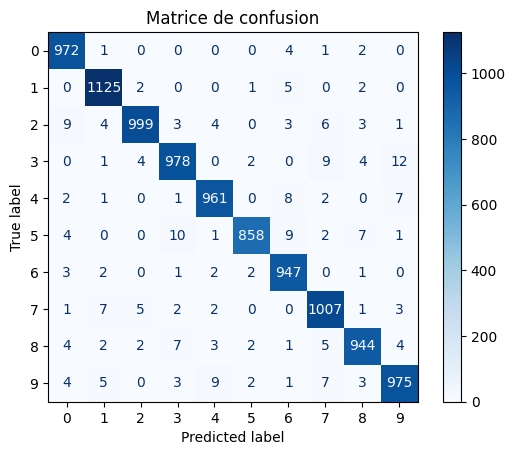

In [17]:
# 📦 Import des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 📥 1. Charger et prétraiter MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 🖼️ Afficher des exemples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label : {y_train[i]}")
    plt.axis("off")
plt.suptitle("Exemples d'images du dataset MNIST")
plt.tight_layout()
plt.show()

# 🧠 2. Construire le modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 🏋️‍♀️ 3. Entraîner le modèle
history = model.fit(X_train, y_train_cat, epochs=10, validation_split=0.1)

# 📊 4. Évaluer le modèle
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Accuracy sur les données de test : {test_acc:.4f}")

# 🔍 Prédictions et matrice de confusion
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=range(10))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matrice de confusion")
plt.show()
